In [1]:
# Import all dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# csv file reporting all factors needed for fertilizer prediction
# head of that csv file with some data
data = pd.read_csv('Fertilizer Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Phosphorous,Potassium,Fertilizer Name
0,21,45,76.0,Loamy soil,Tomato,100.000,70.00,160.000,5-10-5
1,20,86,80.0,Loamy soil,Potato,2500.000,1333.00,5000.000,Dr. Earth Organic Vegetable Fertilizer
2,25,50,66.0,Sandy loam soil,Pepper Bell,416.000,687.00,937.000,Miracle-Gro Water Soluble All Purpose Plant Fo...
3,17,40,80.0,Sandy soil,Tomato,110.000,76.00,153.000,8-16-16
4,21,70,79.0,Clayey loam soil,Pepper Bell,0.025,0.01,0.075,Seaweed Extract Fertilizer


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      34 non-null     int64  
 1   Humidity         34 non-null     int64  
 2   Moisture         34 non-null     float64
 3   Soil Type        34 non-null     object 
 4   Crop Type        34 non-null     object 
 5   Nitrogen         34 non-null     float64
 6   Phosphorous      34 non-null     float64
 7   Potassium        34 non-null     float64
 8   Fertilizer Name  34 non-null     object 
dtypes: float64(4), int64(2), object(3)
memory usage: 2.5+ KB


In [4]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [5]:
#checking unique values
data.nunique()

Temparature    14
Humidity       26
Moisture       27
Soil_Type      12
Crop_Type       3
Nitrogen       31
Phosphorous    32
Potassium      32
Fertilizer     16
dtype: int64

In [6]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Phosphorous    0
Potassium      0
Fertilizer     0
dtype: int64

In [7]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Phosphorous,Potassium,Fertilizer
count,34.000000,34.000000,34.000000,34,34,34.000000,34.000000,34.000000,34
unique,NaN,NaN,NaN,12,3,NaN,NaN,NaN,16
top,NaN,NaN,NaN,Alluvial soil,Tomato,NaN,NaN,NaN,Jobe's Organics Vegetable & Tomato Fertilizer ...
freq,NaN,NaN,NaN,6,12,NaN,NaN,NaN,4
mean,22.794118,64.294118,62.329118,NaN,NaN,601.371618,528.177941,931.729265,NaN
std,5.232645,13.009389,22.488808,NaN,NaN,1163.989374,963.174566,1708.137825,NaN
min,15.000000,40.000000,17.980000,NaN,NaN,0.025000,0.000000,0.000000,NaN
25%,19.250000,54.750000,55.250000,NaN,NaN,11.250000,4.750000,4.500000,NaN
50%,21.000000,64.500000,71.000000,NaN,NaN,121.000000,88.000000,98.500000,NaN
75%,27.000000,72.250000,79.000000,NaN,NaN,503.250000,598.750000,901.000000,NaN


In [8]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data.Fertilizer)
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.Fertilizer, ax=axes[1])

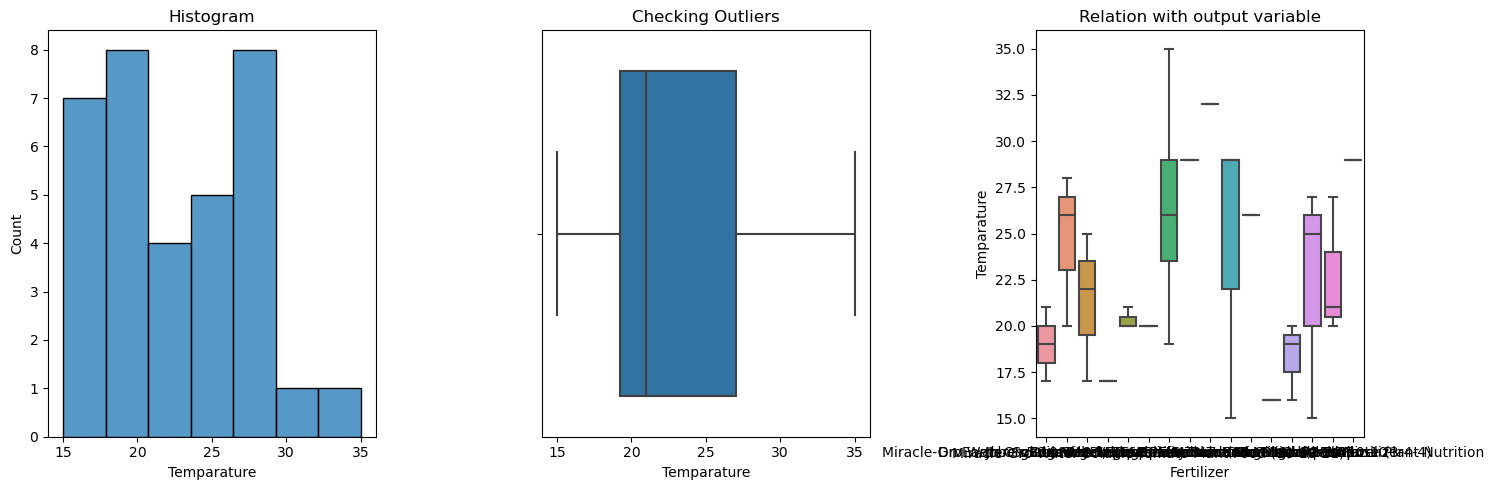

In [9]:
#EDA - Temparature variable
plot_conti(data.Temparature)

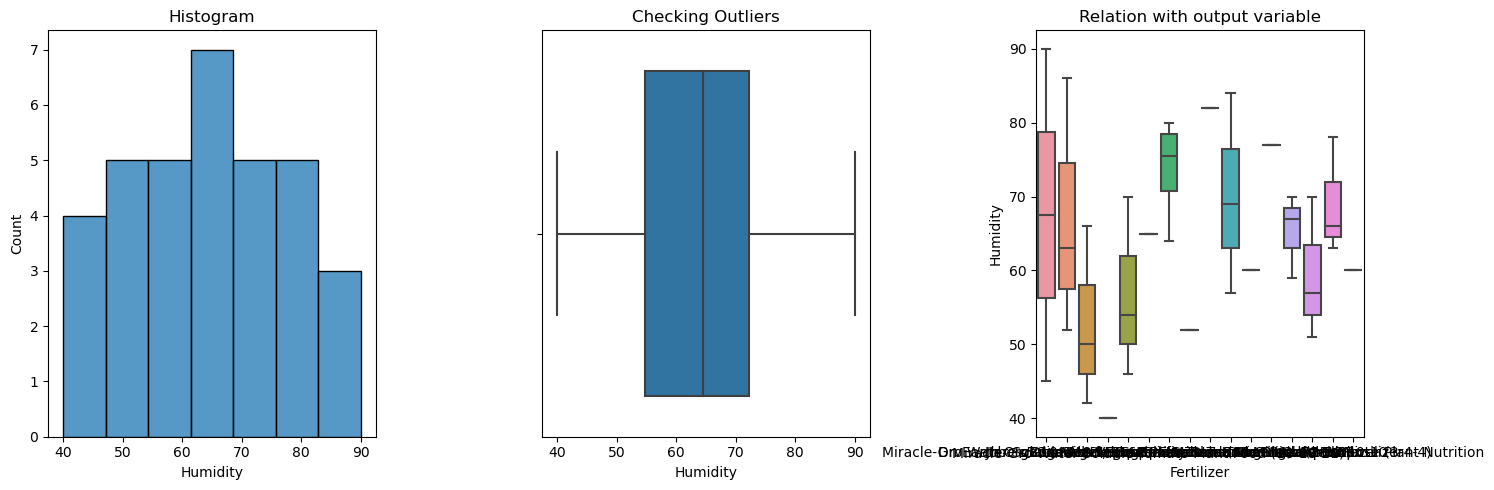

In [10]:
#EDA - Humidity variable
plot_conti(data.Humidity)

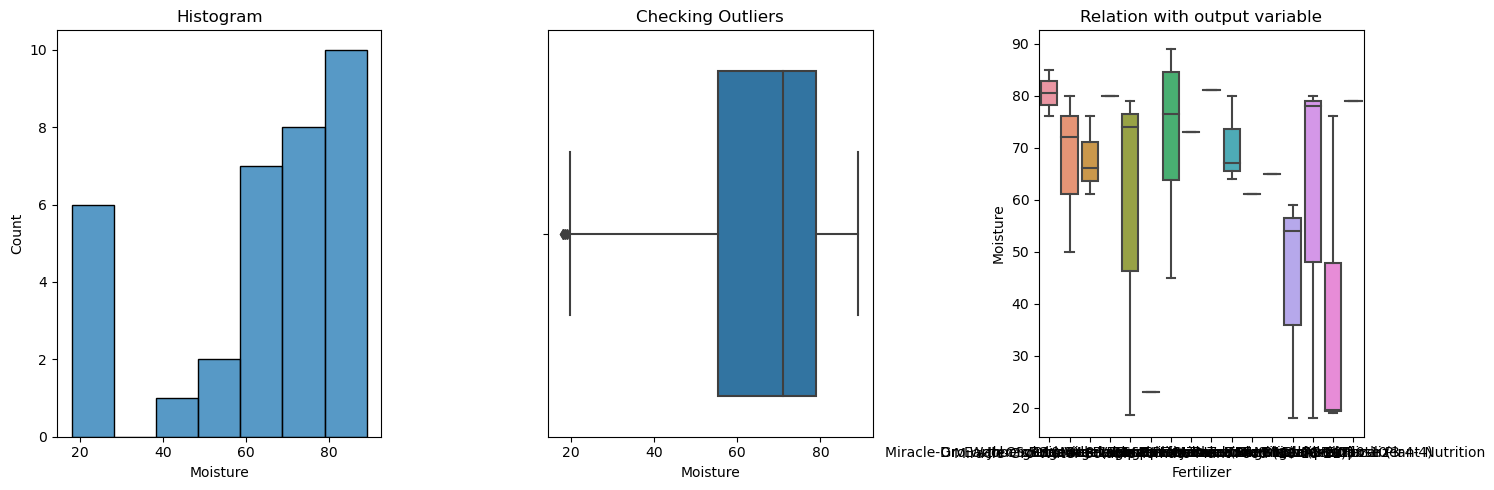

In [11]:
#EDA - Moisture variable
plot_conti(data.Moisture)

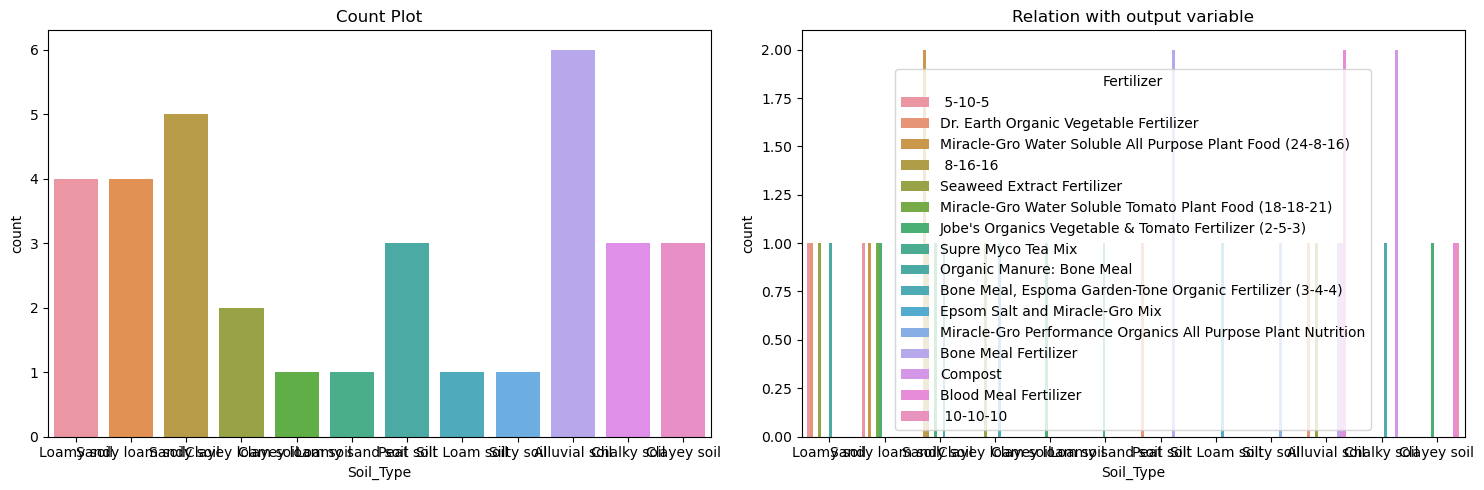

In [12]:
#EDA - Soil_Type variable
plot_cato(data.Soil_Type)

<AxesSubplot:xlabel='Soil_Type', ylabel='Temparature'>

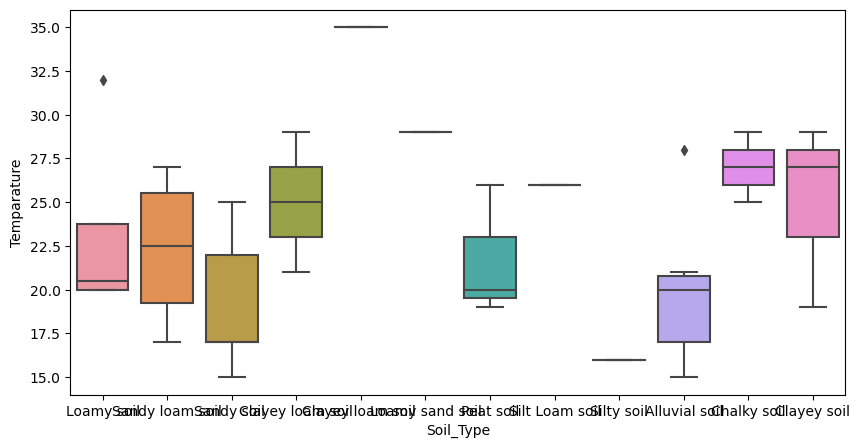

In [13]:
#relation of soil type with Temperature 
plt.figure(figsize=(10,5))
sns.boxplot(x=data.Soil_Type,y=data.Temparature)

<AxesSubplot:xlabel='Soil_Type', ylabel='Temparature'>

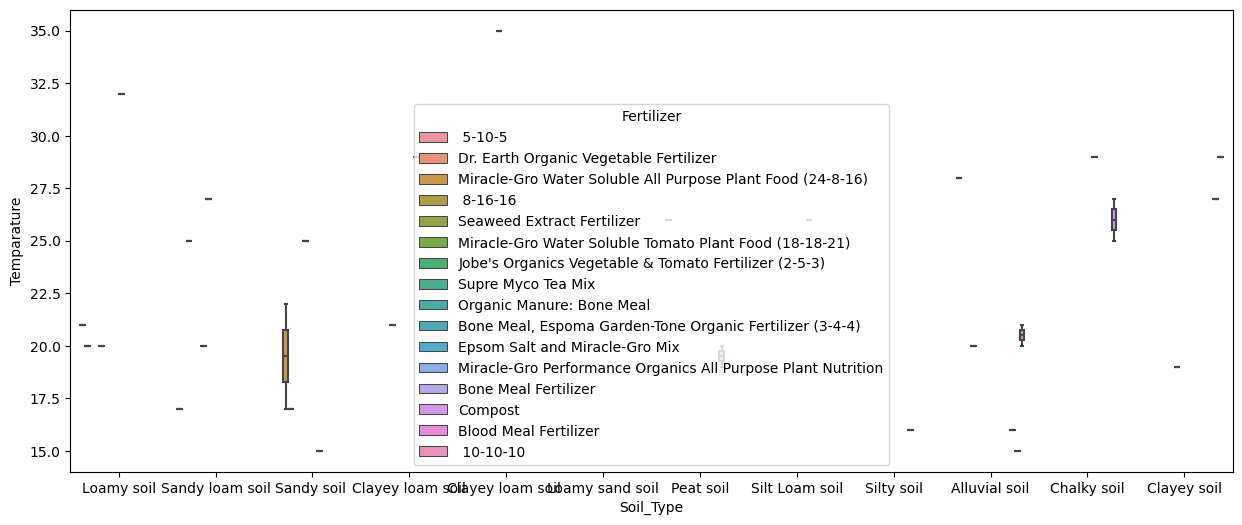

In [14]:
#relation of soil type and Temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Soil_Type,y=data.Temparature,hue=data.Fertilizer)

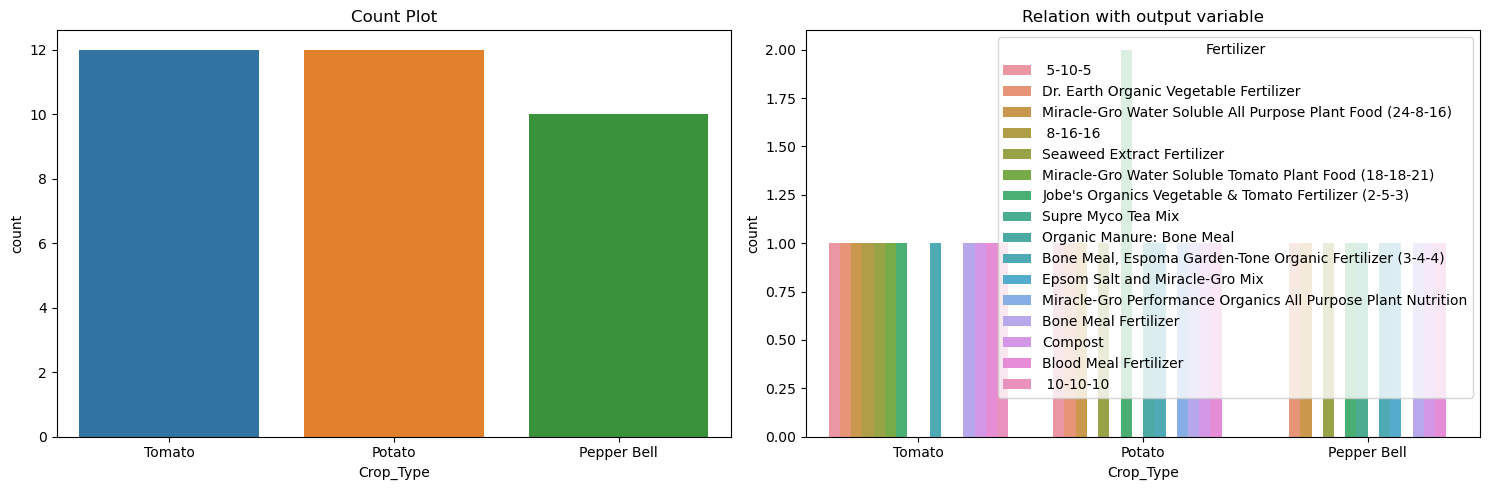

In [15]:
#EDA - Crop_Type variable
plot_cato(data.Crop_Type)

<AxesSubplot:xlabel='Crop_Type', ylabel='Temparature'>

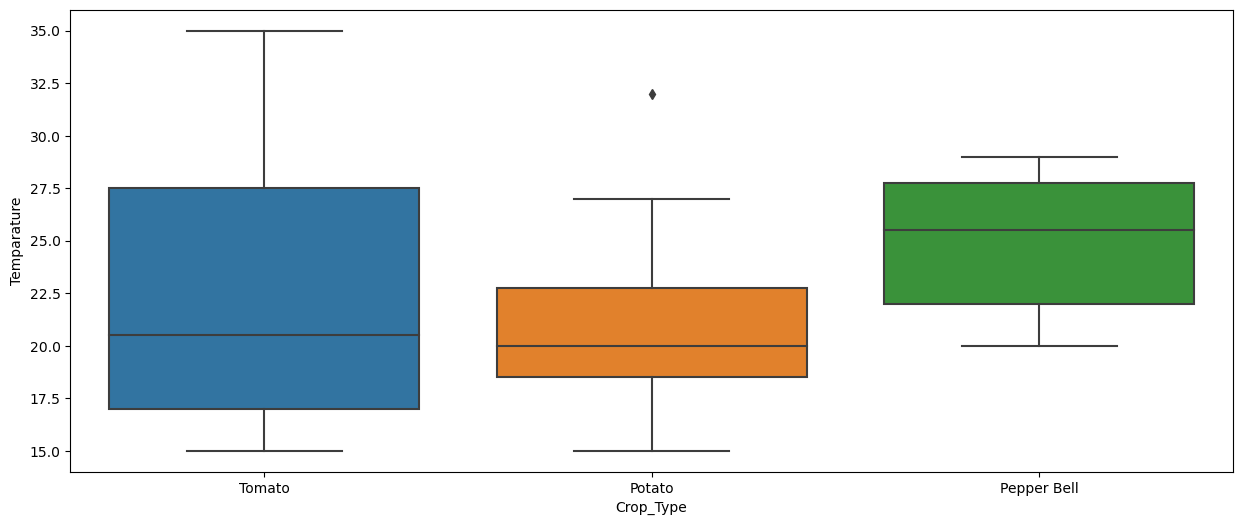

In [16]:
#relation of crop type with temperature
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Crop_Type,y=data.Temparature)

<AxesSubplot:xlabel='Crop_Type', ylabel='Humidity'>

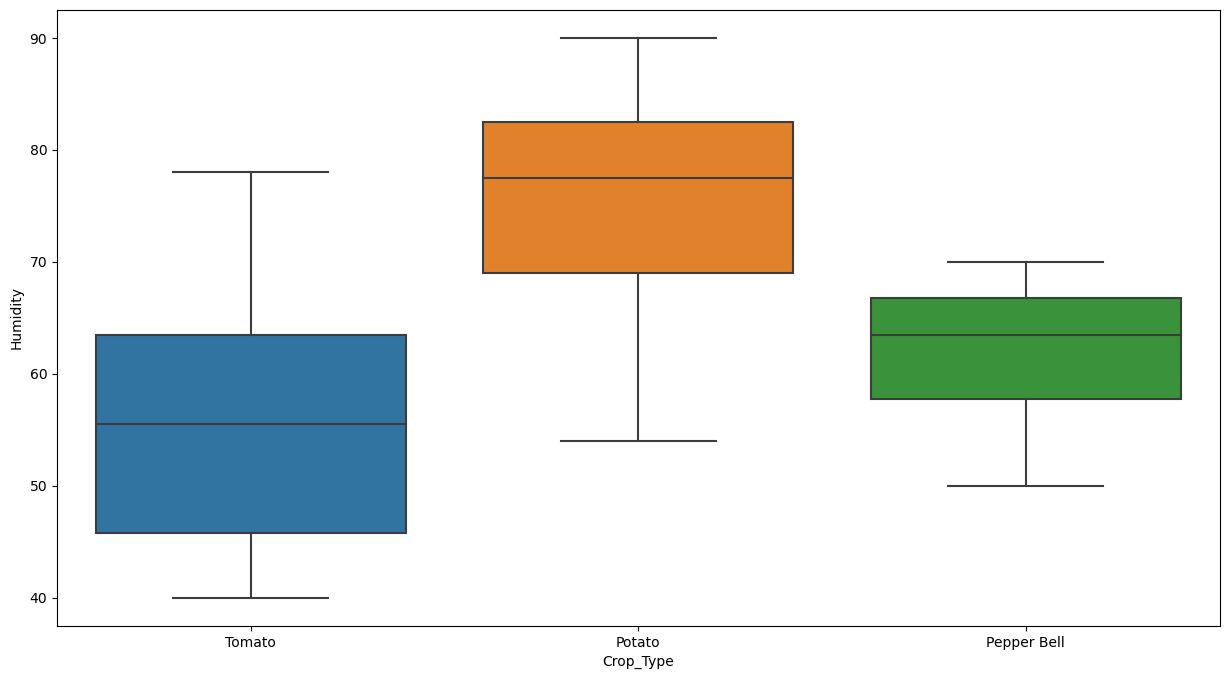

In [17]:
#relation of crop type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Humidity)

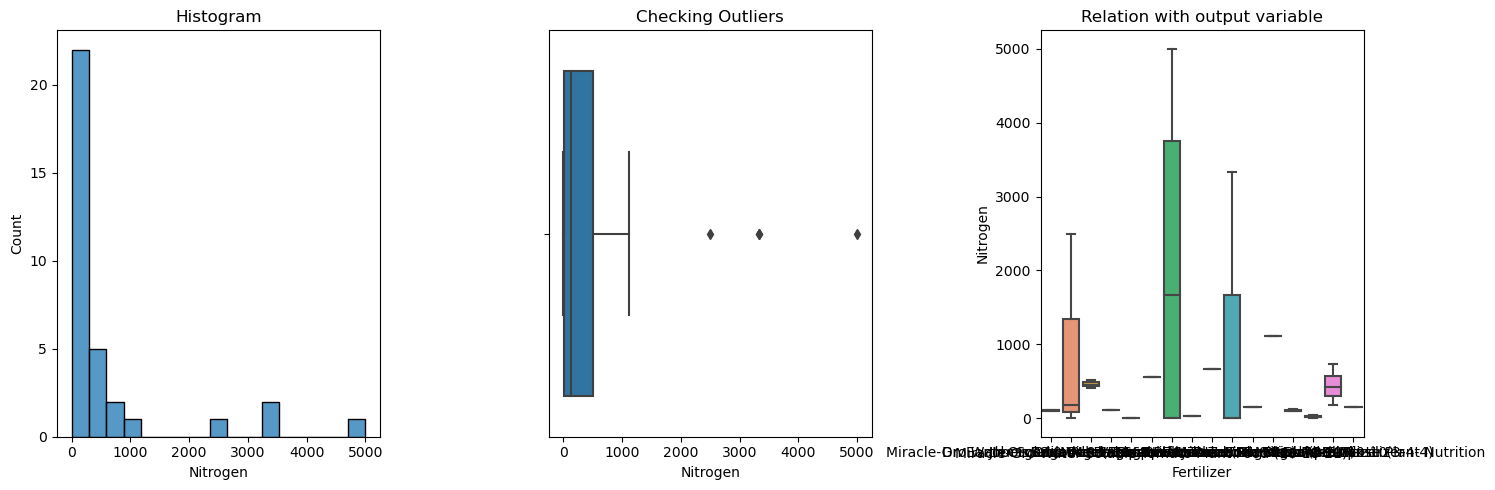

In [18]:
#EDA - Nitrogen variable
plot_conti(data.Nitrogen)

<AxesSubplot:xlabel='Crop_Type', ylabel='Nitrogen'>

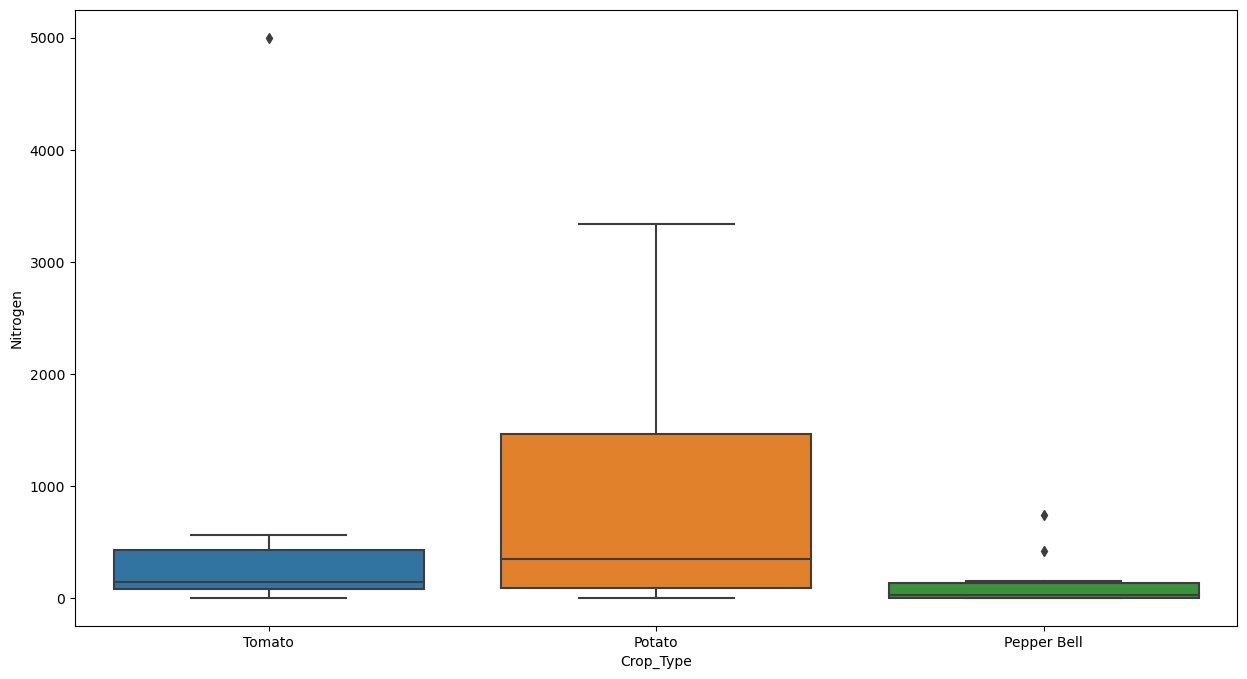

In [19]:
#relation of nitrogen wrt to crop type
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Nitrogen)

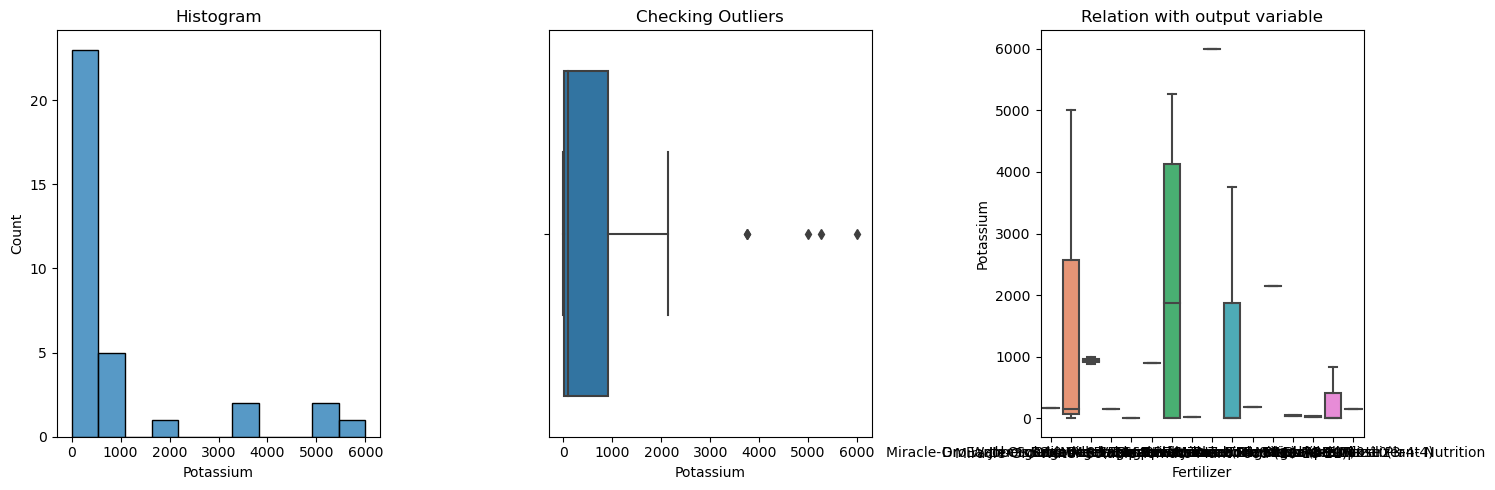

In [20]:
#EDA - Potassium variable
plot_conti(data.Potassium)

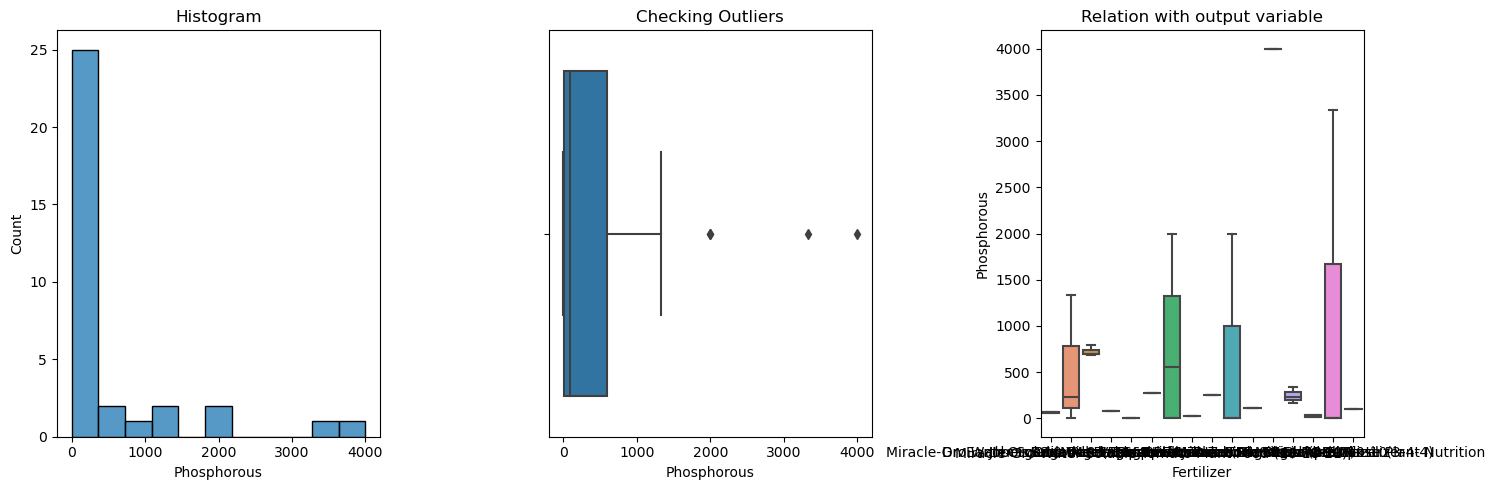

In [21]:
#EDA - Phosphorous variable
plot_conti(data.Phosphorous)

In [22]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [23]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Alluvial soil,0
Chalky soil,1
Clayey loam soil,2
Clayey loam soil,3
Clayey soil,4
Loamy sand soil,5
Loamy soil,6
Peat soil,7
Sandy loam soil,8


In [24]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Pepper Bell,0
Potato,1
Tomato,2


In [25]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-10-10,0
5-10-5,1
8-16-16,2
Blood Meal Fertilizer,3
Bone Meal Fertilizer,4
"Bone Meal, Espoma Garden-Tone Organic Fertilizer (3-4-4)",5
Compost,6
Dr. Earth Organic Vegetable Fertilizer,7
Epsom Salt and Miracle-Gro Mix,8


In [26]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (27, 8), y_train = (27,), x_test = (7, 8), y_test = (7,)


In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 25 to 12
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temparature  27 non-null     int64  
 1   Humidity     27 non-null     int64  
 2   Moisture     27 non-null     float64
 3   Soil_Type    27 non-null     int32  
 4   Crop_Type    27 non-null     int32  
 5   Nitrogen     27 non-null     float64
 6   Phosphorous  27 non-null     float64
 7   Potassium    27 non-null     float64
dtypes: float64(4), int32(2), int64(2)
memory usage: 1.7 KB


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

In [30]:
pred_rand = rand.fit(x_train,y_train).predict(x_test)
print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0

    accuracy                           0.14         7
   macro avg       0.10      0.10      0.10         7
weighted avg       0.14      0.14      0.14         7



In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0

    accuracy                           0.14         7
   macro avg       0.10      0.10      0.10         7
weighted avg       0.14      0.14      0.14         7

Best score :  0.22222222222222224
Best params :  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 400}


In [33]:
params = {
    'n_estimators':[350,400,450],
    'max_depth':[2,3,4,5,6,7],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(data.drop('Fertilizer',axis=1),data.Fertilizer)

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best score :  0.35606060606060613
Best params :  {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 350}


In [34]:
x_train

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Phosphorous,Potassium
25,27,70,80.00,1,0,15.000,20.00,18.000
24,15,51,17.98,0,2,10.000,17.00,20.000
30,20,46,74.00,6,2,0.500,0.20,0.670
17,22,66,61.00,9,1,519.000,698.00,1001.000
22,29,69,64.00,1,2,3.000,4.00,6.000
4,21,70,79.00,2,0,0.025,0.01,0.075
2,25,50,66.00,8,0,416.000,687.00,937.000
21,16,59,18.00,0,2,129.000,334.00,54.000
23,17,42,76.00,9,2,456.000,789.00,889.000
10,17,90,85.00,8,1,113.000,59.00,163.000


In [35]:
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [37]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[27,73,70,8,1,2,7,4]])

array([9])

In [38]:
y_train

25     6
24     6
30    14
17    11
22     5
4     14
2     11
21     4
23    11
10     1
29     3
28     3
18     9
6      9
13     9
7     15
33     9
1      7
16     7
0      1
15     5
5     12
11     7
9      5
31    14
8     13
12     8
Name: Fertilizer, dtype: int32

In [39]:
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [40]:
ferti = pickle.load(open('fertilizer.pkl','rb'))
ferti.classes_[model.predict([[27,73,70,8,1,2,7,4]])]

array(["Jobe's Organics Vegetable & Tomato Fertilizer (2-5-3)"],
      dtype=object)